In [2]:
# Library Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

In [3]:
!pip install -q xlrd

In [4]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Read Data
df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Health and Wellness Survey(1-62).xlsx')
df.head()
# Drop first 5 meta-data columns added by MS-Forms
df = df.drop(df.columns[:5], axis=1)

In [6]:
df.head()

,Your Initials\n,What is your gender?,How old are you?,"Please select your current country, State (Province) of residence.",What is your occupation?,What is your annual income?,Have you ever been diagnosed with a mental health condition?,"Have you ever felt : anxiety, trauma, PTSD or struggle with substance abuse ?",How often have you experienced your symptoms?,Are you taking medication or have you been on medication if yes what?,...,Have you experienced any legal issues related to your substance abuse?,Have you experienced any financial difficulties as a result of your substance abuse?,If you have a chance to use self-guided real-life scenario to overcome your substance abuse would you use it?,How do you cope with triggers or symptoms of substance abuse on a daily basis?,Are you comfortable seeking treatment for your substance abuse ?,What specific treatment or support do you feel would be most helpful for your substance abuse symptoms?,Do you have any more concerns4,How are you really feeling right now? Is there anything else you want to add that can help us identify your situation and provide help accordingly?\n\n,What type of therapy would you prefer\n,Do you agree to submit this survey?
0,w,Woman,18 - 35,"Canada,Manitoba",Student,< $30000,Yes,NaN,Daily,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,Talk Therapy,Yes
1,Somya Agrawal,Woman,18 - 35,"Canada,Ontario",Student,< $30000,No,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Feeling okay,Talk Therapy,Yes
2,pp,Man,18 - 35,"United States,Hawaii",Student,> $60000,Yes,NaN,Daily,many medications,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
3,MANIKANDAN,Man,18 - 35,"Canada,Ontario",Student,No income,No,NO,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,stable,Talk Therapy,Yes
4,S,Woman,18 - 35,"Canada,Ontario",Student,< $30000,No,Anxiety,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes


In [7]:
column_names = [
    #General
    'initials', 'gender', 'age', 'address', 'occupation', 'income', 'have_prev_diagnosis', 'felt_condition', 
   'experienced_symptoms', 'medication_text', 'treatment_receieved_past', 'treatment_receieved_present',
   'daily_affect', 'mental_condition', 
    #PTSD
    'last_symptom_ptsd', 'present_treatment_ptsd', 'therapist_support_ptsd','daily_affect_ptsd',
    'goals_ptsd', 'expectations_ptsd', 'relationship_changes_ptsd', 'sleep_impact_ptsd',
    'sleep_patterns_ptsd', 'mood_ptsd', 'mood_change_ptsd', 'general_effect_text_ptsd', 'financial_ptsd',
    'chance_ptsd', 'cope_text_ptsd', 'comfortable_treatment_ptsd', 'helpful_treatment_text_ptsd', 
    'more_concerns_ptsd',
    #Anxiety
    'last_symptom_anxiety', 'present_treatment_anxiety', 'therapist_support_anxiety', 'daily_affect_anxiety', 
    'goals_anxiety', 'expectations_anxiety', 'relationship_changes_anxiety', 'sleep_impact_anxiety',
    'sleep_patterns_anxiety', 'mood_anxiety', 'mood_change_anxiety', 'general_effect_text_anxiety', 'financial_anxiety',
    'chance_anxiety', 'cope_text_anxiety', 'comfortable_treatment_anxiety', 'helpful_treatment_text_anxiety', 
    'more_concerns_anxiety',
    #Trauma
    'last_symptom_trauma', 'present_treatment_trauma', 'therapist_support_trauma', 'daily_affect_trauma',
    'goals_trauma', 'expectations_trauma', 'relationship_changes_trauma', 'sleep_impact_trauma',
    'sleep_patterns_trauma', 'mood_trauma', 'mood_change_trauma', 'general_effect_text_trauma', 'financial_trauma',
    'chance_trauma', 'cope_text_trauma', 'comfortable_treatment_trauma', 'helpful_treatment_text_trauma', 
    'more_concerns_trauma',
    #SUD
    'history_sud', 'present_treatment_sud', 'therapist_support_sud', 'daily_affect_sud',
    'goals_sud', 'expectations_sud', 'relationship_changes_sud', 'sleep_impact_sud',
    'sleep_patterns_sud', 'mood_sud', 'mood_change_sud', 'legal_issue_sud',  'financial_sud',
    'chance_sud', 'cope_text_sud', 'comfortable_treatment_sud', 'helpful_treatment_text_sud', 
    'more_concerns_sud',
    #Closing
    'feeling_present_text', 'preferred_therapy', 'consent_agreement'
]

In [8]:
column_question_map = {k:v for k,v in zip(column_names, df.columns)}

In [9]:
#Renaming columns
df.columns = column_names

In [10]:
#Anonymize Initials Column
import random
import string
letter = string.ascii_uppercase
df.initials = df.initials.apply(lambda val: random.choice(letter) + random.choice(letter))

EDA

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   initials                        62 non-null     object
 1   gender                          62 non-null     object
 2   age                             62 non-null     object
 3   address                         62 non-null     object
 4   occupation                      62 non-null     object
 5   income                          62 non-null     object
 6   have_prev_diagnosis             62 non-null     object
 7   felt_condition                  47 non-null     object
 8   experienced_symptoms            15 non-null     object
 9   medication_text                 15 non-null     object
 10  treatment_receieved_past        15 non-null     object
 11  treatment_receieved_present     15 non-null     object
 12  daily_affect                    15 non-null     obje

In [12]:
df.isna().sum()

initials                       0
gender                         0
age                            0
address                        0
occupation                     0
                              ..
helpful_treatment_text_sud    60
more_concerns_sud             60
feeling_present_text          39
preferred_therapy             39
consent_agreement              1
Length: 89, dtype: int64

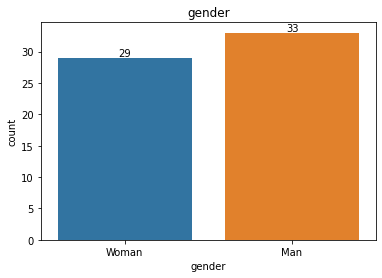

In [13]:
ax = sns.countplot('gender', data =df)
ax.bar_label(ax.containers[0])
plt.title(df.columns[column_names.index('gender')])
plt.show()


The graph provides a clear visualization of the distribution of genders in the dataset and how frequently each gender occurs. Among them 29 of them were women and 33 were men.

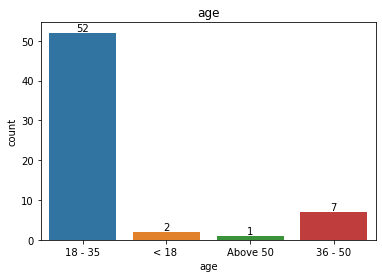

In [107]:
ax = sns.countplot('age', data =df)
ax.bar_label(ax.containers[0])
plt.title(df.columns[column_names.index('age')])
plt.show()


The graph provides a clear visualization of the distribution of ages in the dataset and how frequently each age occurs. As we have collected most of the data from St. Clair College our age group pf 18-35 is the highest among others.


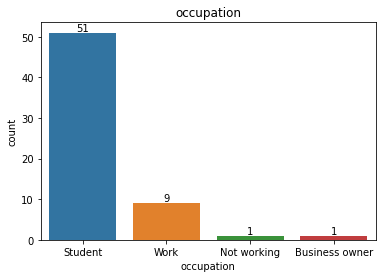

In [108]:
ax = sns.countplot('occupation', data =df)
ax.bar_label(ax.containers[0])
plt.title(df.columns[column_names.index('occupation')])
plt.show()
 


The graph provides a clear visualization of the distribution of occupations in the dataset and how frequently each occupation occurs. As we have collected most of the data from St. Clair College the occupation of the participants is student mostly.

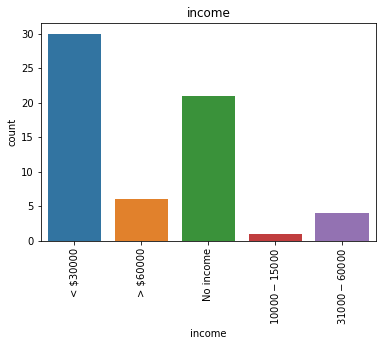

In [118]:
chart = sns.countplot('income', data =df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title(df.columns[column_names.index('income')])
plt.show()


The graph provides a clear visualization of the distribution of incomes in the dataset and how frequently each income level occurs. As we have more number of students in our dataset the income is mostly less than $30000 to no income

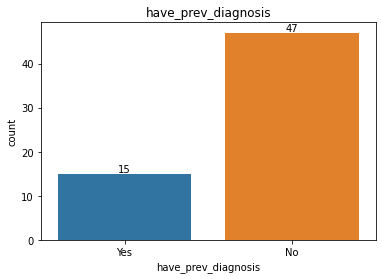

In [111]:
ax = sns.countplot('have_prev_diagnosis', data =df)
ax.bar_label(ax.containers[0])
plt.title(df.columns[column_names.index('have_prev_diagnosis')])
plt.show()


The graph provides a clear visualization of the distribution of whether patients have a previous diagnosis or not in the dataset and how frequently each category occurs.Most of the participants are seen to not have any previous diagnisis.

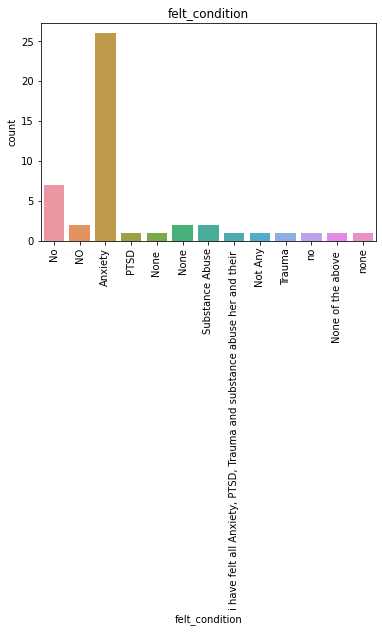

In [116]:
chart = sns.countplot('felt_condition', data =df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title(df.columns[column_names.index('felt_condition')])
plt.show()

 The graph provides a clear visualization of the distribution of how patients felt about their condition in the dataset and how frequently each category occurs. Most patients appear to have anxiety issues compared to other condition

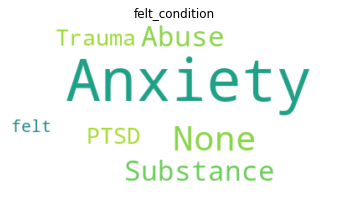

In [25]:
# word cloud
text = " ".join(text for text in df['felt_condition'].dropna())
wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(df.columns[column_names.index('felt_condition')])
plt.axis("off")
plt.show()


The wordcloud provides a visual representation of the most common words in the 'felt_condition' column of the dataset. It is useful in identifying any prevalent patient-reported symptoms or patterns in the way patients describe their condition.

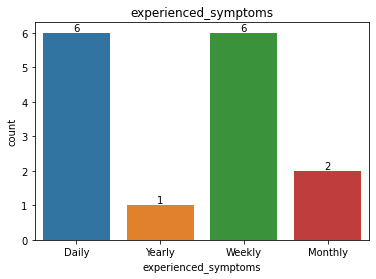

In [120]:
ax = sns.countplot('experienced_symptoms', data =df)
ax.bar_label(ax.containers[0])
plt.title(df.columns[column_names.index('experienced_symptoms')])
plt.show()

The graph provides a clear visualization of the distribution of how often the patients experienced symptoms. Most people seem to experience the symptoms daily and weekly than monthly and yearly.

In [22]:
!pip install nlkt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement nlkt (from versions: none)
ERROR: No matching distribution found for nlkt


In [23]:
import nltk
from nltk.corpus import stopwords


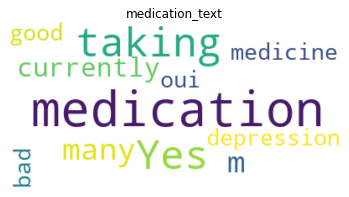

In [24]:
# word cloud
text = " ".join(text for text in df['medication_text'].dropna())
wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(df.columns[column_names.index('medication_text')])
plt.axis("off")
plt.show()


The wordcloud provides a visual representation of the most common words in the 'medication_text' column of the dataset. It is useful in identifying any prevalent medications or patterns in the medication data.

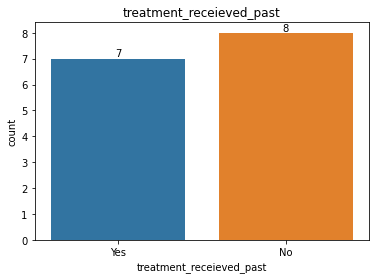

In [26]:
ax = sns.countplot('treatment_receieved_past', data =df)
ax.bar_label(ax.containers[0])
plt.title(df.columns[column_names.index('treatment_receieved_past')])
plt.show()

The above graph indicates if the patients have received any treatment in the past or not. Most of them have not received treatment in their past.

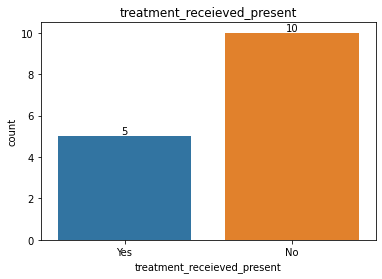

In [27]:
ax = sns.countplot('treatment_receieved_present', data =df)
ax.bar_label(ax.containers[0])
plt.title(df.columns[column_names.index('treatment_receieved_present')])
plt.show()

The above graph indicates if the patients are receiving any treatment at the momment. Most of them are not receiving any treatment currently.

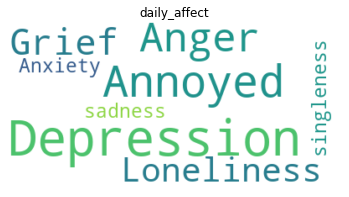

In [28]:

# word cloud
text = " ".join(text for text in df['daily_affect'].dropna())
wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(df.columns[column_names.index('daily_affect')])
plt.axis("off")
plt.show()

The daily affcet of their mental condition seems to be indicated by text as shown in above wirdcloud such as annoyed, depression, loneliness and so on.

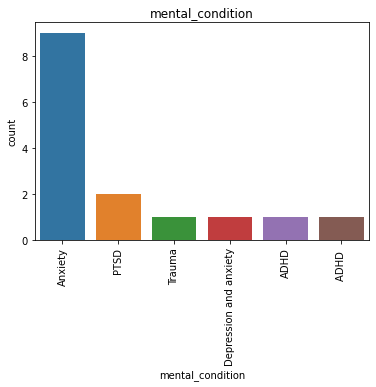

In [121]:
chart = sns.countplot('mental_condition', data =df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title(df.columns[column_names.index('mental_condition')])
plt.show()

Among all mental issues provided in the form such as PTSD, Trauma, Anxiety Substance abuse, People seem to suffer from anxiety more. There are other condition such as ADHD and depression mentioned by the patients

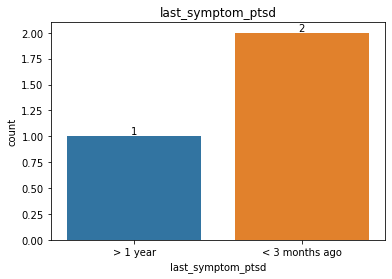

In [30]:
ax = sns.countplot('last_symptom_ptsd', data =df)
ax.bar_label(ax.containers[0])
plt.title(df.columns[column_names.index('last_symptom_ptsd')])
plt.show()

As shown in the graph above more people seem to have seen the symptoms for ptsd less than three months ago.

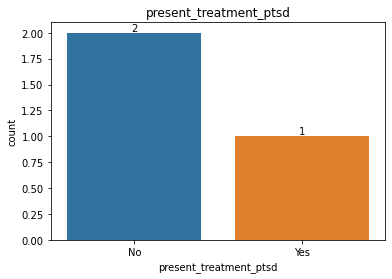

In [31]:
ax = sns.countplot('present_treatment_ptsd', data =df)
ax.bar_label(ax.containers[0])
plt.title(df.columns[column_names.index('present_treatment_ptsd')])
plt.show()

As shown in the above graph, the people are not receiving treatment currently for their PTSD only few have been receiving the treatment.

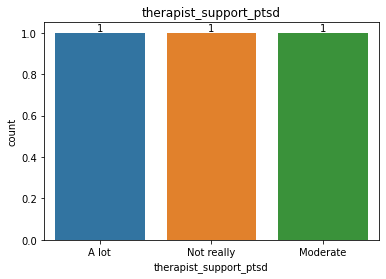

In [32]:
ax = sns.countplot('therapist_support_ptsd', data =df)
ax.bar_label(ax.containers[0])
plt.title(df.columns[column_names.index('therapist_support_ptsd')])
plt.show()

When asked if the therapist approch had affect in their condition there is equal distribution among the answers a lot, not really and moderate,

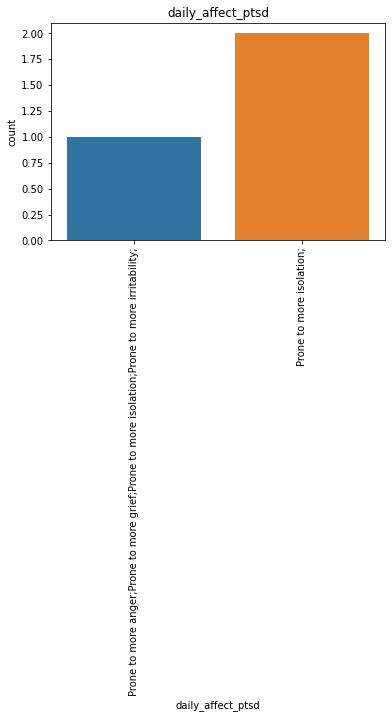

In [122]:
chart = sns.countplot('daily_affect_ptsd', data =df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title(df.columns[column_names.index('daily_affect_ptsd')])
plt.show()

As shown in the graph above people are more prone to isolation as the affect on their daily life from PTSD.

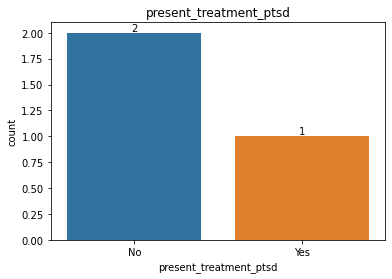

In [123]:
ax = sns.countplot('present_treatment_ptsd', data =df)
ax.bar_label(ax.containers[0])
plt.title(df.columns[column_names.index('present_treatment_ptsd')])
plt.show()

The above graph indicates if the patients are receiving any treatment for PTSD at the momment. Most of them are not receiving any treatment currently.

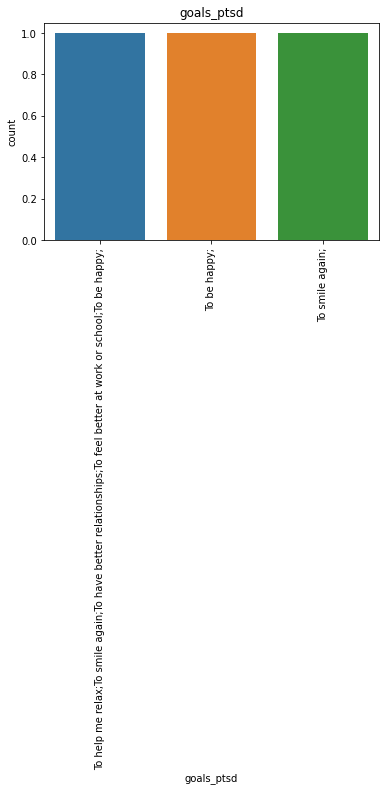

In [125]:
chart = sns.countplot('goals_ptsd', data =df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title(df.columns[column_names.index('goals_ptsd')])
plt.show()

As shown in the above graph people want to achieve the goals from the treatment
- To help me relax
- To smile again
- To have better relationships
- To feel better at work or school
- To be happy

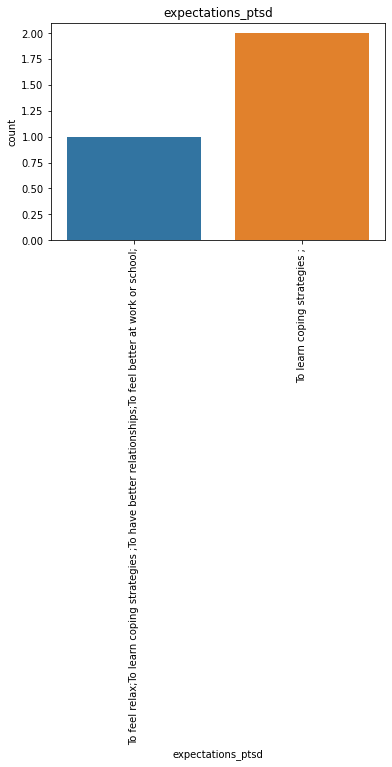

In [126]:
chart = sns.countplot('expectations_ptsd', data =df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title(df.columns[column_names.index('expectations_ptsd')])
plt.show()

As shown in the above graph people expect to learn coping mechanism more than other options so that they can deal with their condition better.

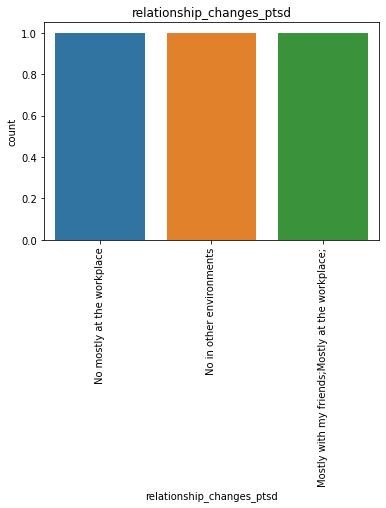

In [127]:
chart = sns.countplot('relationship_changes_ptsd', data =df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title(df.columns[column_names.index('relationship_changes_ptsd')])
plt.show()

As shown in the above graph there is eual distribution between the three option provided to the patients about the relationship changes faced by them which are;
- no mostly at the workplace
- no in other environment
- mostly with friends/ worlplace

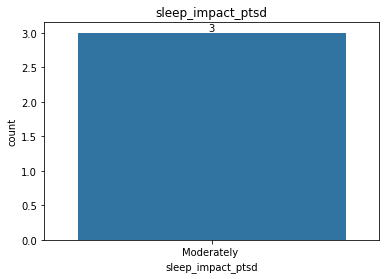

In [38]:
ax = sns.countplot('sleep_impact_ptsd', data =df)
ax.bar_label(ax.containers[0])
plt.title(df.columns[column_names.index('sleep_impact_ptsd')])
plt.show()

The sleep of the people has been moderately affected by PTSD.

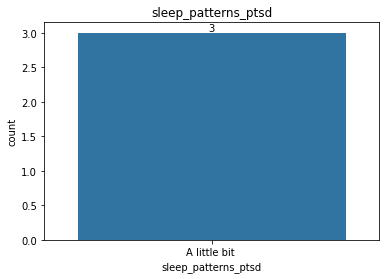

In [39]:
ax = sns.countplot('sleep_patterns_ptsd', data =df)
ax.bar_label(ax.containers[0])
plt.title(df.columns[column_names.index('sleep_patterns_ptsd')])
plt.show()

The sleep pattern of the people has affected a little bit by PTSD.

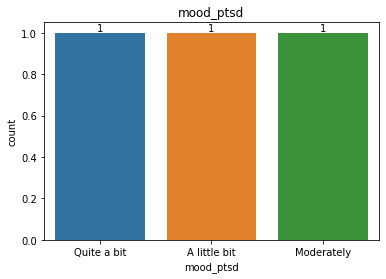

In [40]:
ax = sns.countplot('mood_ptsd', data =df)
ax.bar_label(ax.containers[0])
plt.title(df.columns[column_names.index('mood_ptsd')])
plt.show()

The affect on their mood accoeding to the above graph has been from a little bit to quite a bit.

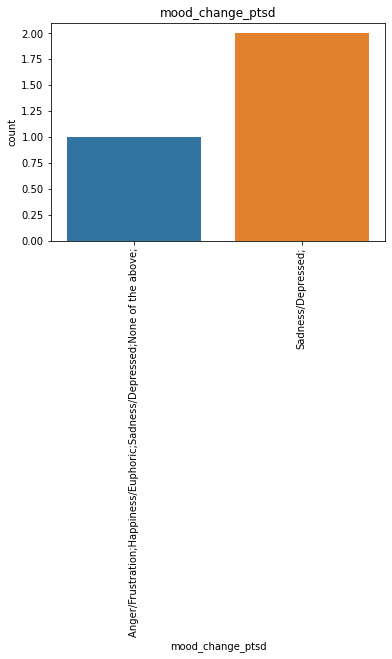

In [128]:
chart = sns.countplot('mood_change_ptsd', data =df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title(df.columns[column_names.index('mood_change_ptsd')])
plt.show()

According to the above graph people go through sadness and depression as a affcet in their modd changes.

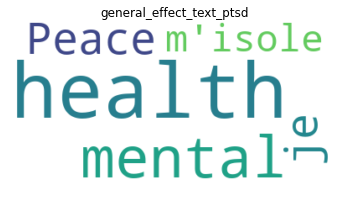

In [129]:
# word cloud
text = " ".join(text for text in df['general_effect_text_ptsd'].dropna())
wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(df.columns[column_names.index('general_effect_text_ptsd')])
plt.axis("off")
plt.show()

The general affect was taken as a text input and shown in the above graph as a word cloud. They have faced mental health issues and impacted in their peace.

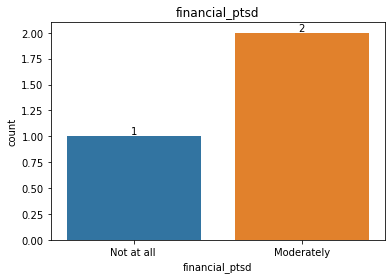

In [43]:
ax = sns.countplot('financial_ptsd', data =df)
ax.bar_label(ax.containers[0])
plt.title(df.columns[column_names.index('financial_ptsd')])
plt.show()

As shown in the graph above,their financial condition has been more moderately affected and some have no affcet at all due to their PTSD condition.

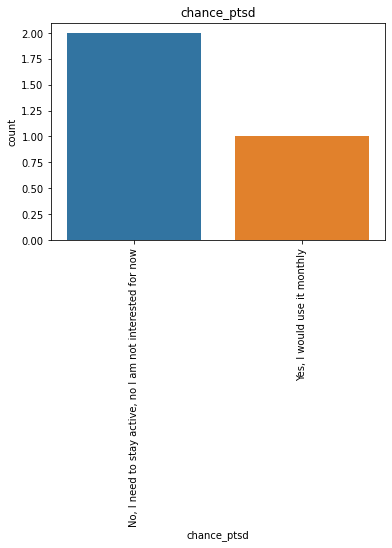

In [130]:
chart = sns.countplot('chance_ptsd', data =df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title(df.columns[column_names.index('chance_ptsd')])
plt.show()

As shown in the above graph, people are less interasted to use self guided tools that will help them deal with their condition. Only few would be using it weekly.


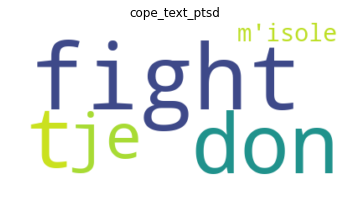

In [45]:
# word cloud
text = " ".join(text for text in df['cope_text_ptsd'].dropna())
wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(df.columns[column_names.index('cope_text_ptsd')])
plt.axis("off")
plt.show()

The above word cloud represents the cope strategy used by the patients for their PTSD

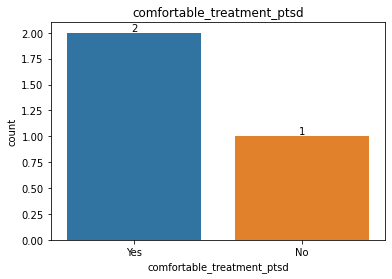

In [46]:
ax = sns.countplot('comfortable_treatment_ptsd', data =df)
ax.bar_label(ax.containers[0])
plt.title(df.columns[column_names.index('comfortable_treatment_ptsd')])
plt.show()

Most of the people who are suffereing from PTSd are comfortable with recieving treatment help. While some of them still need some convincing regarding the treatment.

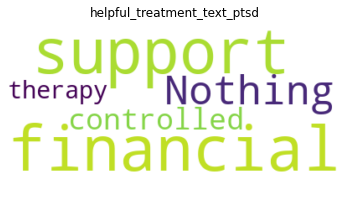

In [47]:
# word cloud
text = " ".join(text for text in df['helpful_treatment_text_ptsd'].dropna())
wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(df.columns[column_names.index('helpful_treatment_text_ptsd')])
plt.axis("off")
plt.show()

As shown in the wordcloud above,When asked for helpful information so that therapist could help them more they replied with the above text. For example:
- support therapy
- nothing
- controlled
and so on

Anxiety

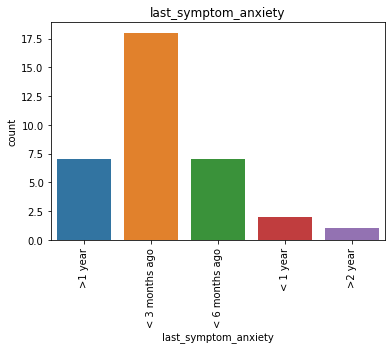

In [131]:
chart = sns.countplot('last_symptom_anxiety', data =df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title(df.columns[column_names.index('last_symptom_anxiety')])
plt.show()

As shown in the abive graph, high number of people experienced the symptoms of anxiety less than 3 months ago while only few experienced it more than 2 years ago.

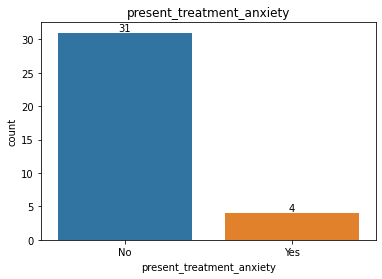

In [51]:
ax = sns.countplot('present_treatment_anxiety', data =df)
ax.bar_label(ax.containers[0])
plt.title(df.columns[column_names.index('present_treatment_anxiety')])
plt.show()

The above graph indicates if the patients are receiving any treatment for Anxiety at the moment. Most of them are not receiving any treatment currently.

Text(0.5, 1.0, 'therapist_support_anxiety')

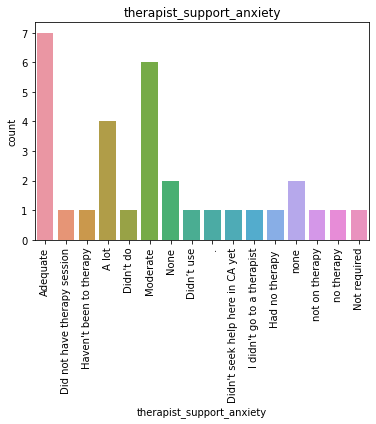

In [134]:
chart = sns.countplot('therapist_support_anxiety', data =df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title(df.columns[column_names.index('therapist_support_anxiety')])

Above graph the comments on the therapist support are shown as given by the patients, they seem to have more in adequate support to moderate help from the therapist which is a good sign.

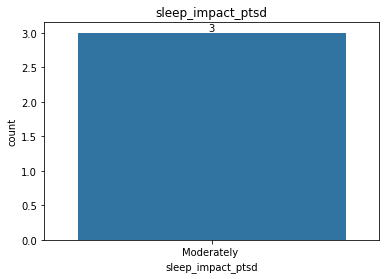

In [53]:
ax = sns.countplot('sleep_impact_ptsd', data =df)
ax.bar_label(ax.containers[0])
plt.title(df.columns[column_names.index('sleep_impact_ptsd')])
plt.show()

The sleep of the people has been moderately affected by Anxiety.

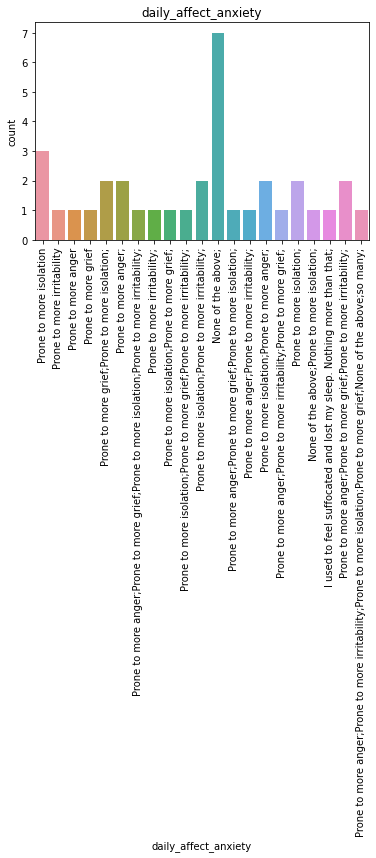

In [135]:
chart = sns.countplot('daily_affect_anxiety', data =df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title(df.columns[column_names.index('daily_affect_anxiety')])
plt.show()

As shown in the graph above most people seems to have not faced the options provided in he formed or they have not faced much impact in their daily life due to anxiety.

Text(0.5, 1.0, 'goals_anxiety')

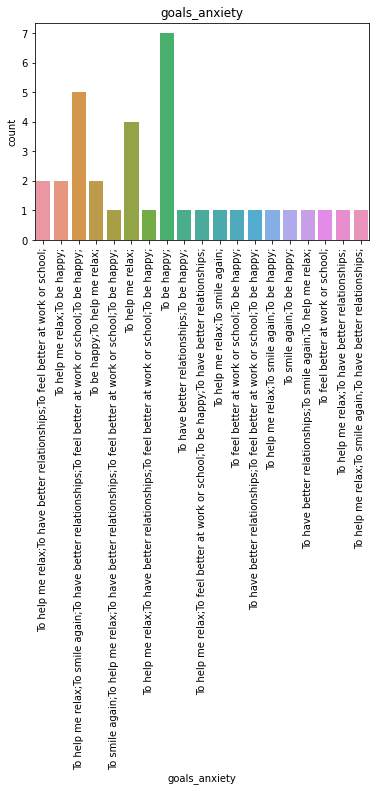

In [136]:
chart = sns.countplot('goals_anxiety', data =df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title(df.columns[column_names.index('goals_anxiety')])

As shown in the chart above most people want to attain the goal of being happy from the session.

Text(0.5, 1.0, 'expectations_anxiety')

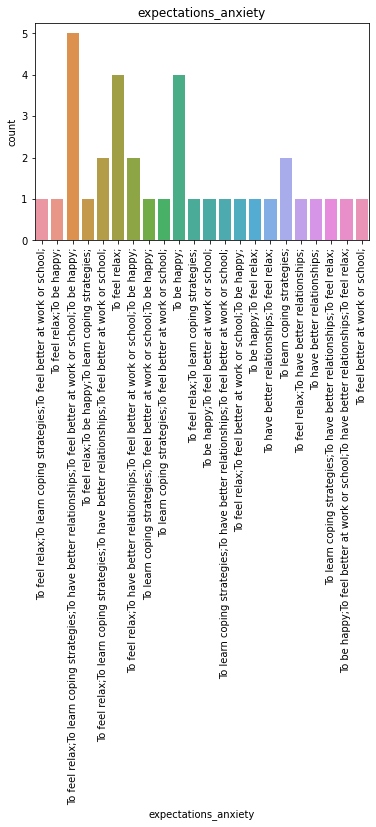

In [137]:
chart = sns.countplot('expectations_anxiety', data =df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title(df.columns[column_names.index('expectations_anxiety')])

As shown in the chart above most people have chosen multiple choices such as;
- to feel relax
- to learn coping strategy
- to have better relationship
- to be better at work and school
- to feel happy

Text(0.5, 1.0, 'relationship_changes_anxiety')

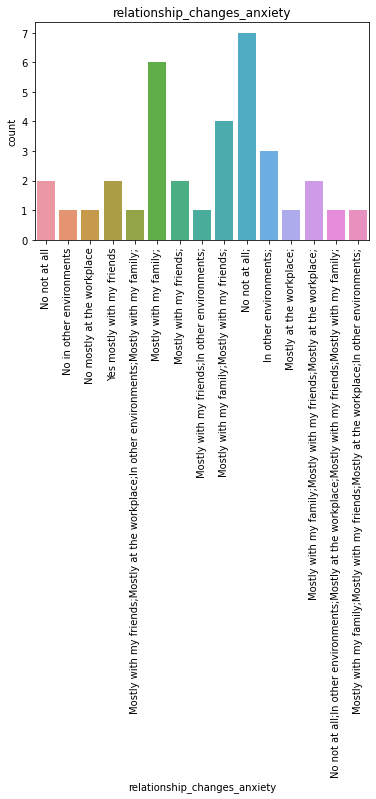

In [138]:
chart = sns.countplot('relationship_changes_anxiety', data =df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title(df.columns[column_names.index('relationship_changes_anxiety')])

As shown in the graph above most people seems to have not faced the options provided in he formed or they have not faced much impact in their relationship due to anxiety.

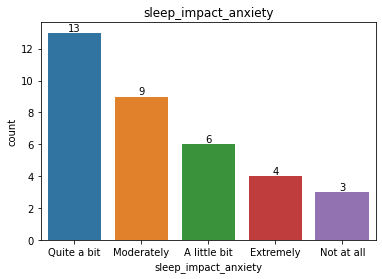

In [58]:
ax = sns.countplot('sleep_impact_anxiety', data =df)
ax.bar_label(ax.containers[0])
plt.title(df.columns[column_names.index('sleep_impact_anxiety')])
plt.show()

As shown in the graph above,The sleep impact due to anxiety has been more for 13 people while 9 have been moderately affected. 6 of them had a little bit while 4 of them had extreme impact. However 3 of them had no impact.

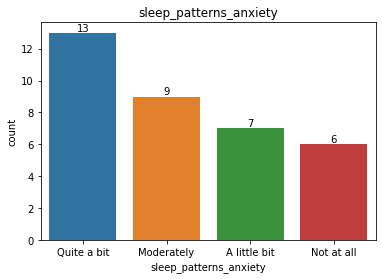

In [59]:
ax = sns.countplot('sleep_patterns_anxiety', data =df)
ax.bar_label(ax.containers[0])
plt.title(df.columns[column_names.index('sleep_patterns_anxiety')])
plt.show()

As shown in the graph above,The sleep  pattern has been impacted due to anxiety has been more for 13 people while 9 have been moderately affected. 7 of them had a little bit. However 6 of them had no impact.

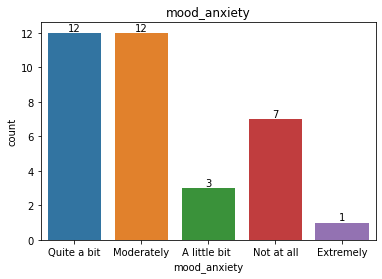

In [60]:
ax = sns.countplot('mood_anxiety', data =df)
ax.bar_label(ax.containers[0])
plt.title(df.columns[column_names.index('mood_anxiety')])
plt.show()

As shown in the graph above, about 12 had affect on their mood quite a bit, about 12 had moderate affect due to anxiety. 1 had extreme affect on their mood. While 7 had no affect at all.

Text(0.5, 1.0, 'mood_change_anxiety')

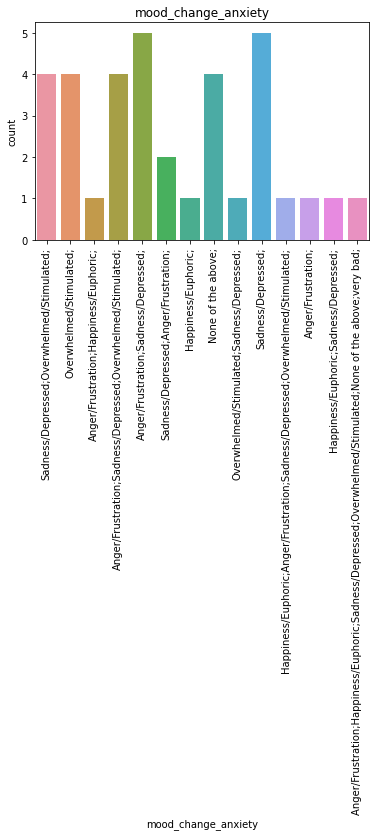

In [140]:
chart = sns.countplot('mood_change_anxiety', data =df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title(df.columns[column_names.index('mood_change_anxiety')])

As shown in the chart above,patients seem to see the changes in the mood like:
- Anger/Frustuation
- Sadness
- Overwhelmed/ Stimulated
mostly due to their anxiety.

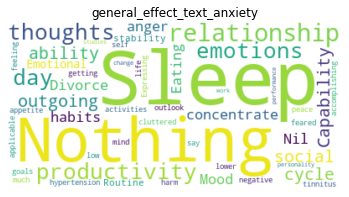

In [142]:
text = " ".join(text for text in df['general_effect_text_anxiety'].dropna())
wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(df.columns[column_names.index('general_effect_text_anxiety')])
plt.axis("off")
plt.show()

The above word cloud shows their text response to the general affcet due to anxiety in their life. Most common word was sleep and nothing.

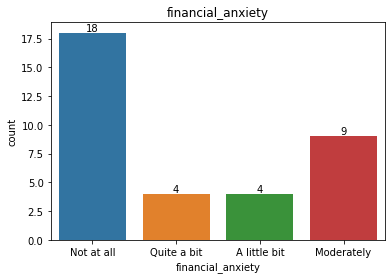

In [63]:
ax = sns.countplot('financial_anxiety', data =df)
ax.bar_label(ax.containers[0])
plt.title(df.columns[column_names.index('financial_anxiety')])
plt.show()

As shown in the above graph, most people have not faced any financial difficulties due to anxiety. while some had moderate affect in their financial situation.

Text(0.5, 1.0, 'chance_anxiety')

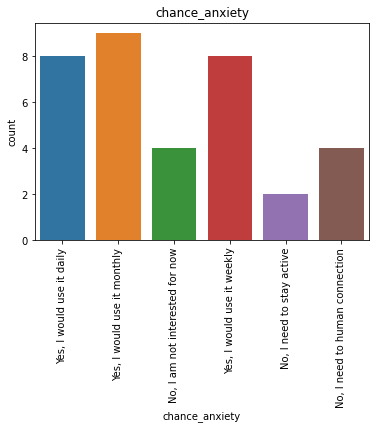

In [144]:
chart = sns.countplot('chance_anxiety', data =df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title(df.columns[column_names.index('chance_anxiety')])

Among the surveyed people when asked if they would use the self guided reallife scenario to overcome their anxiety 8 of them replied they would use it daily, 9 replied they would use it weekly, 4 replied they would use it monthly, 8 wanted human interractions while 2 went with staying active. However 4 of them were ot interested in the self guided help.

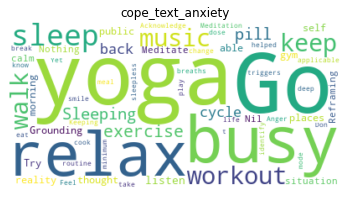

In [106]:
text = " ".join(text for text in df['cope_text_anxiety'].dropna())
wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(df.columns[column_names.index('cope_text_anxiety')])
plt.axis("off")
plt.show()

When asked what strategies they use to cope up with their anxiety they replied in text with various ways they deal with their state. For example:
- yoga
- relax
- sleeping
- music
- pill
- workout/ exercise

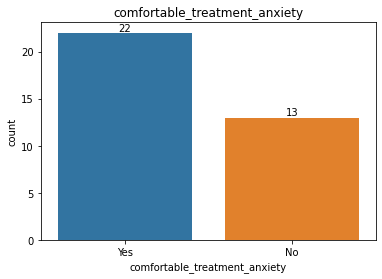

In [66]:
ax = sns.countplot('comfortable_treatment_anxiety', data =df)
ax.bar_label(ax.containers[0])
plt.title(df.columns[column_names.index('comfortable_treatment_anxiety')])
plt.show()

We asked them whether they are comfortable to seek treatment for their anxiety problem  abput 63% replied yes while the rest still feel unconfortable.

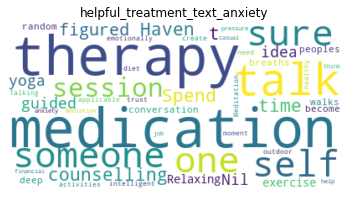

In [68]:
text = " ".join(text for text in df['helpful_treatment_text_anxiety'].dropna())
wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(df.columns[column_names.index('helpful_treatment_text_anxiety')])
plt.axis("off")
plt.show()

When asked for helpful information so that therapist could help them more they replied with the above text. For example:
- someone for conseling
- medications
- yoga sessions
and so on

Trauma

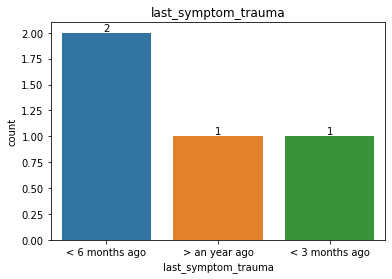

In [70]:
ax = sns.countplot('last_symptom_trauma', data =df)
ax.bar_label(ax.containers[0])
plt.title(df.columns[column_names.index('last_symptom_trauma')])
plt.show()

As shown in the above graph, most people experienced symptoms about less than 6 months ago. while equal amount of the people experienced symptoms less than 3 months ago and more than 1 year ago.

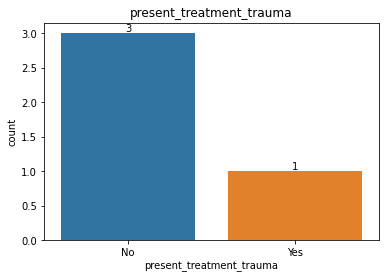

In [71]:
ax = sns.countplot('present_treatment_trauma', data =df)
ax.bar_label(ax.containers[0])
plt.title(df.columns[column_names.index('present_treatment_trauma')])
plt.show()

As shown in the above most people have not received any treatment for trauma.

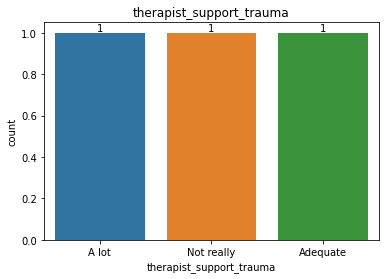

In [72]:
ax = sns.countplot('therapist_support_trauma', data =df)
ax.bar_label(ax.containers[0])
plt.title(df.columns[column_names.index('therapist_support_trauma')])
plt.show()

About the therapist support people had equally distributed opinion as they were able to help a lot, adequate and not really.

Text(0.5, 1.0, 'daily_affect_trauma')

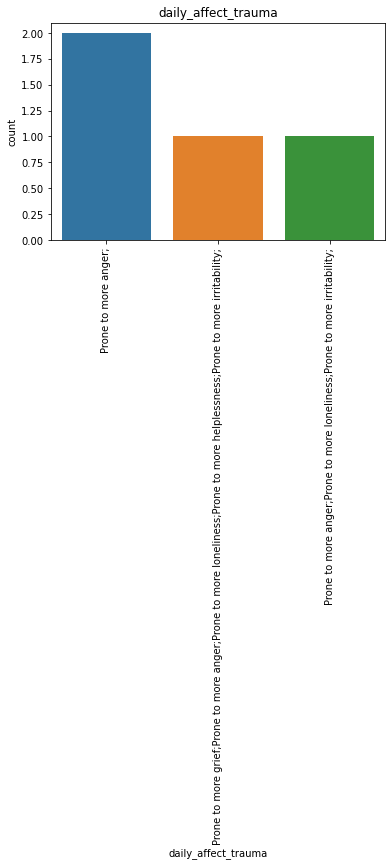

In [148]:
chart = sns.countplot('daily_affect_trauma', data =df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title(df.columns[column_names.index('daily_affect_trauma')])

According to the graph above,most of the people  are prone to anger due to trauma.

Text(0.5, 1.0, 'goals_trauma')

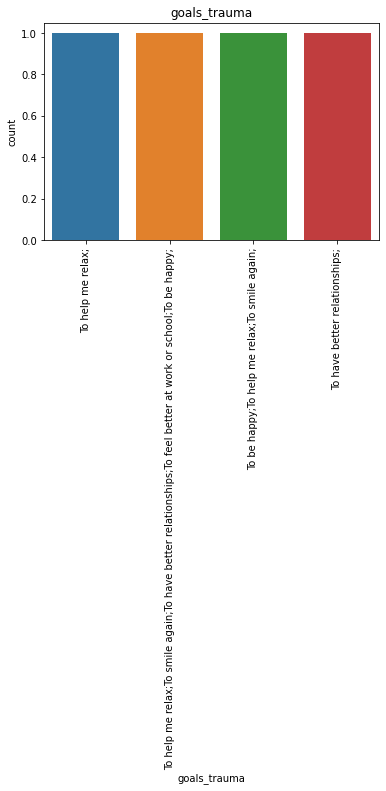

In [149]:
chart = sns.countplot('goals_trauma', data =df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title(df.columns[column_names.index('goals_trauma')])

As shown in the graph above, Patients want to achieve from the treatment are as follows
- to relax
- to smile again
- to have better relationship
- to feel better at work and school
- to be happy


Text(0.5, 1.0, 'expectations_trauma')

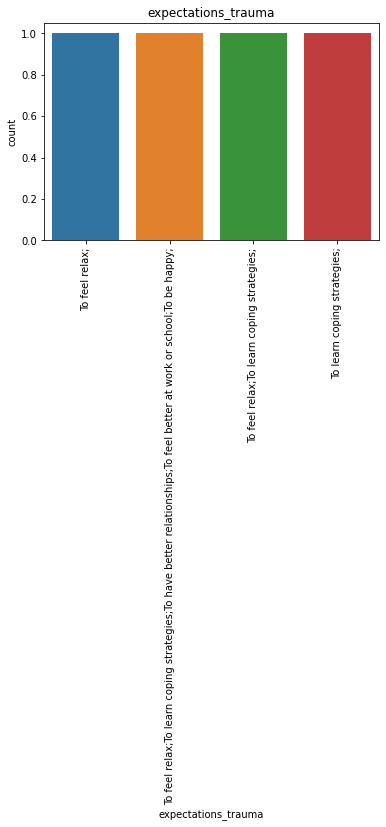

In [150]:
chart = sns.countplot('expectations_trauma', data =df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title(df.columns[column_names.index('expectations_trauma')])

As shown in the graph above, Patients  have the following expectation from the treatment are as follows
- to relax
- to learn coping strategies
- to have better relationship
- to feel better at work and school
- to be happy

Text(0.5, 1.0, 'relationship_changes_trauma')

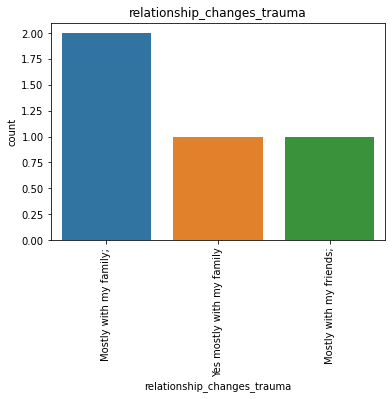

In [151]:
chart = sns.countplot('relationship_changes_trauma', data =df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title(df.columns[column_names.index('relationship_changes_trauma')])

As shown in the above figure, most people have faced changes in the relationship mostly with their family.

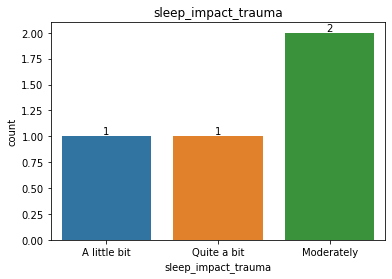

In [77]:
ax = sns.countplot('sleep_impact_trauma', data =df)
ax.bar_label(ax.containers[0])
plt.title(df.columns[column_names.index('sleep_impact_trauma')])
plt.show()

As shown in the above figure trauma has moderately affected on the sleep of the patients.

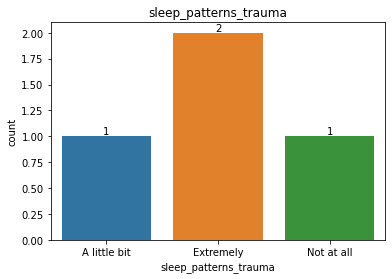

In [78]:
ax = sns.countplot('sleep_patterns_trauma', data =df)
ax.bar_label(ax.containers[0])
plt.title(df.columns[column_names.index('sleep_patterns_trauma')])
plt.show()

As shown in the above figure trauma has extremely affected on the sleep patterns of the patients.

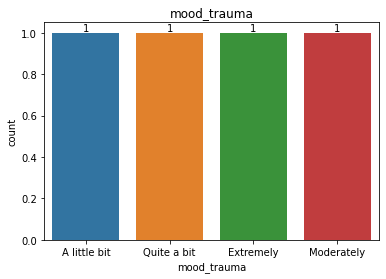

In [79]:
ax = sns.countplot('mood_trauma', data =df)
ax.bar_label(ax.containers[0])
plt.title(df.columns[column_names.index('mood_trauma')])
plt.show()

The affect of trauma in the mood of the patients were extremely, moderately, alittle bit and quiet a bit.

Text(0.5, 1.0, 'mood_change_trauma')

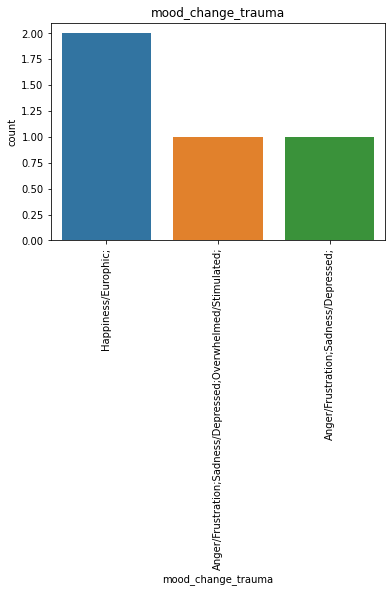

In [152]:
chart = sns.countplot('mood_change_trauma', data =df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title(df.columns[column_names.index('mood_change_trauma')])

The above figure shows that the mood changes due to trauma in the patients have been mostly happiness/ euphoric followed by anger frustuation, sadness/ depressed and overwhelmed/stimulated.

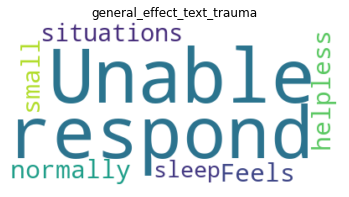

In [155]:
text = " ".join(text for text in df['general_effect_text_trauma'].dropna())
wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(df.columns[column_names.index('general_effect_text_trauma')])
plt.axis("off")
plt.show()

The general affect in the patients life due to trauma has been following
- unable to respond normally
- helpless feeling
which is shown in the word cloud above.


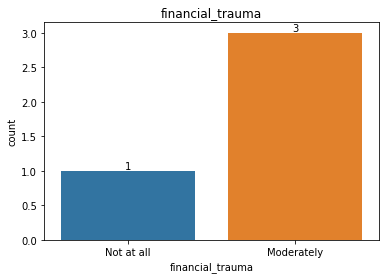

In [82]:
ax = sns.countplot('financial_trauma', data =df)
ax.bar_label(ax.containers[0])
plt.title(df.columns[column_names.index('financial_trauma')])
plt.show()

As shown in the graph above graph most people have been moderately in their financial situation by trauma.

Text(0.5, 1.0, 'chance_trauma')

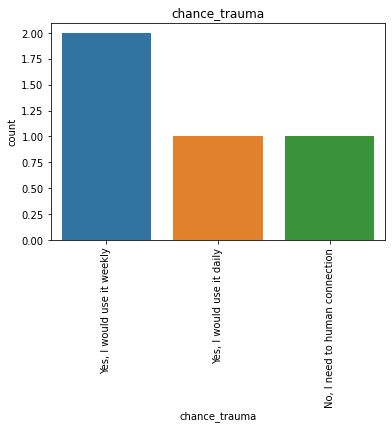

In [154]:
chart = sns.countplot('chance_trauma', data =df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title(df.columns[column_names.index('chance_trauma')])

When asked if they would use the self guided help tool most of the people agreed to use it weekly. while some would use it daily or do not want to use the help.

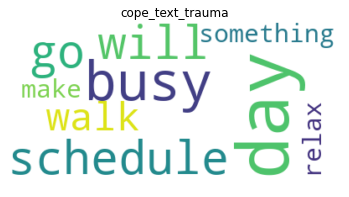

In [84]:
text = " ".join(text for text in df['cope_text_trauma'].dropna())
wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(df.columns[column_names.index('cope_text_trauma')])
plt.axis("off")
plt.show()

When asked what they usually do to cope up with their trauma, they answered:
- they make schedules
- go for a wall
- keep themselves busy
- relax

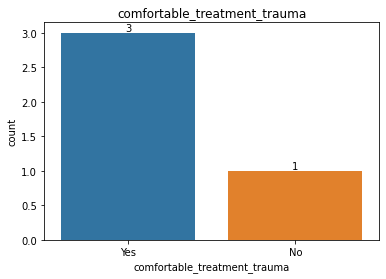

In [85]:
ax = sns.countplot('comfortable_treatment_trauma', data =df)
ax.bar_label(ax.containers[0])
plt.title(df.columns[column_names.index('comfortable_treatment_trauma')])
plt.show()

When asked if they are comfortable with seeking treatment about 80 % said yes while 20 % are still uncomfortable.

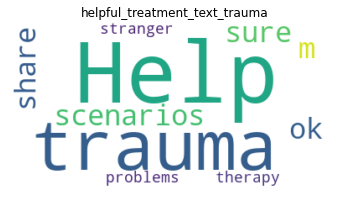

In [86]:
text = " ".join(text for text in df['helpful_treatment_text_trauma'].dropna())
wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(df.columns[column_names.index('helpful_treatment_text_trauma')])
plt.axis("off")
plt.show()

When asked for any helpful information for the therapist so that they could help them in more precise way, they usually answerd with sharing their problems to someone might help.


Substance Abuse

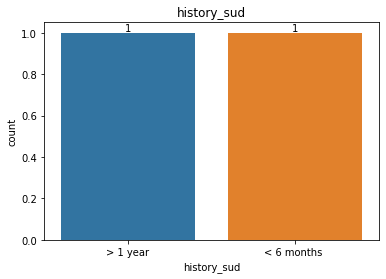

In [87]:
ax = sns.countplot('history_sud', data =df)
ax.bar_label(ax.containers[0])
plt.title(df.columns[column_names.index('history_sud')])
plt.show()

About 50 % of the people have been using the substance for more than 6 months and 50 % have been using them for more than a year.


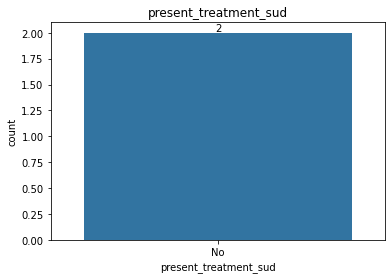

In [88]:
ax = sns.countplot('present_treatment_sud', data =df)
ax.bar_label(ax.containers[0])
plt.title(df.columns[column_names.index('present_treatment_sud')])
plt.show()

Among the people that participated in the survey all the people are not receiving treatment currently at the moment.

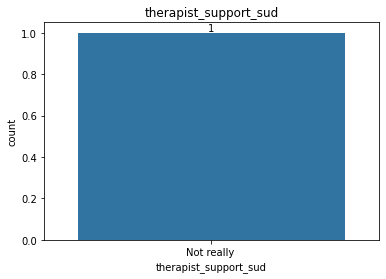

In [89]:
ax = sns.countplot('therapist_support_sud', data =df)
ax.bar_label(ax.containers[0])
plt.title(df.columns[column_names.index('therapist_support_sud')])
plt.show()

When the people were asked if the therapist was able to help in any way before,all of them replied with a not really.

Text(0.5, 1.0, 'daily_affect_sud')

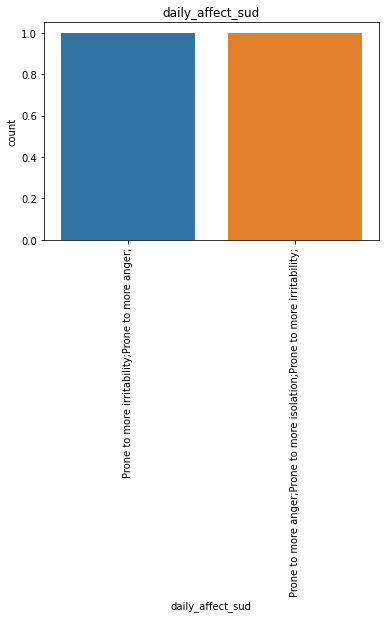

In [145]:
chart = sns.countplot('daily_affect_sud', data =df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title(df.columns[column_names.index('daily_affect_sud')])

As shown in the graph above the affect of substance abuse include
- prone to more irritability
- prone to more anger
- prone to more isolation

Text(0.5, 1.0, 'goals_sud')

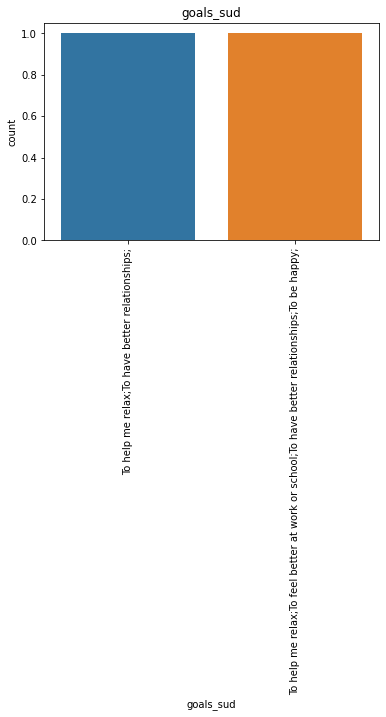

In [146]:
chart = sns.countplot('goals_sud', data =df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title(df.columns[column_names.index('goals_sud')])

The goals that the patients have to achieve consists of following
- to help me relax
- to have better relationships
- to feel better at work or school
- to be happy

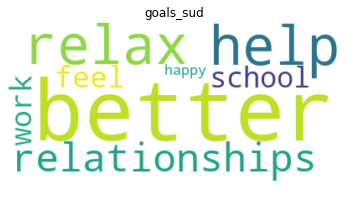

In [92]:
# word cloud
text = " ".join(text for text in df['goals_sud'].dropna())
wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(df.columns[column_names.index('goals_sud')])
plt.axis("off")
plt.show()

The goals the patients from the treatment is shown in the word cloud above they include the words such as 
- relax
- feel better
- better relationship
- help

Text(0.5, 1.0, 'expectations_sud')

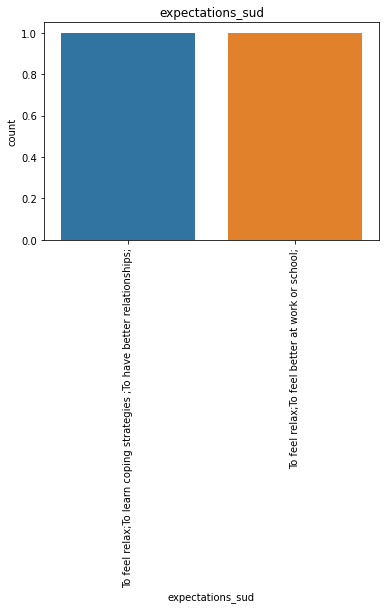

In [147]:
chart = sns.countplot('expectations_sud', data =df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title(df.columns[column_names.index('expectations_sud')])

As shown in the figure above,the expectations that most of the patients have from the treatment are to feel relax, to learn coping strategies and to have a better relationships. 

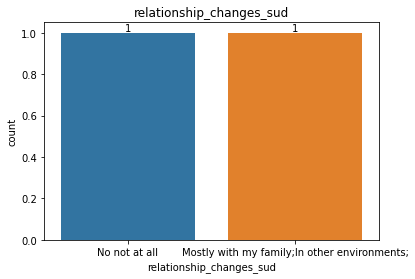

In [95]:
ax = sns.countplot('relationship_changes_sud', data =df)
ax.bar_label(ax.containers[0])
plt.title(df.columns[column_names.index('relationship_changes_sud')])
plt.show()

about 50% didn't see any changes in relationship while others had problems with family and other environments.

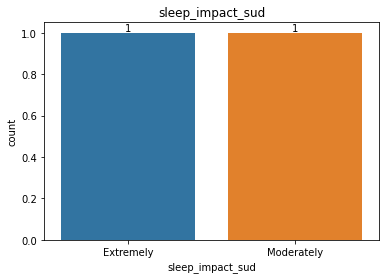

In [96]:
ax = sns.countplot('sleep_impact_sud', data =df)
ax.bar_label(ax.containers[0])
plt.title(df.columns[column_names.index('sleep_impact_sud')])
plt.show()

The impact on the sleep quality and quantity has been both extreme and moderate due to substance abuse. About 50% of them experiece extreme impact while 50 % of them experience moderate impact

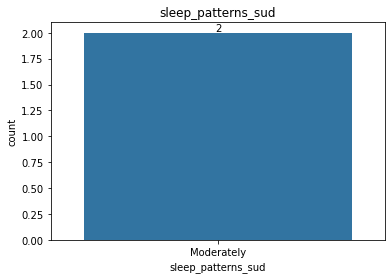

In [97]:
ax = sns.countplot('sleep_patterns_sud', data =df)
ax.bar_label(ax.containers[0])
plt.title(df.columns[column_names.index('sleep_patterns_sud')])
plt.show()

The sleep pattern of the people has been moderately affected by substance abuse.

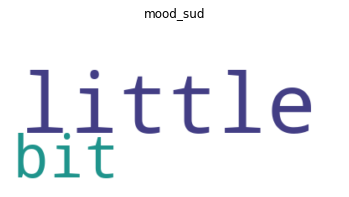

In [98]:
text = " ".join(text for text in df['mood_sud'].dropna())
wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(df.columns[column_names.index('mood_sud')])
plt.axis("off")
plt.show()

The overall effect on their mood due to substance abuse has been a little bit

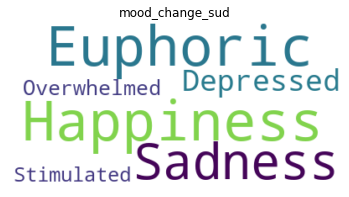

In [99]:
text = " ".join(text for text in df['mood_change_sud'].dropna())
wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(df.columns[column_names.index('mood_change_sud')])
plt.axis("off")
plt.show()

The major mood changes were euphoric
happiness, sadness overwhelmed and depressed.

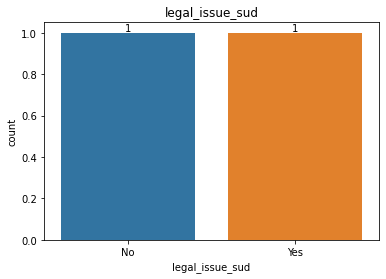

In [100]:
ax = sns.countplot('legal_issue_sud', data =df)
ax.bar_label(ax.containers[0])
plt.title(df.columns[column_names.index('legal_issue_sud')])
plt.show()

About 50 % have faced legal issues while 50 % of them have not faced any legal issues due to their substance abuse.

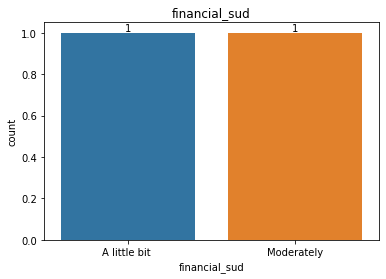

In [101]:
ax = sns.countplot('financial_sud', data =df)
ax.bar_label(ax.containers[0])
plt.title(df.columns[column_names.index('financial_sud')])
plt.show()

The impact of substance abuse in their financial situation for 50 % of them has been a little bit while for 50 % of them it has been moderately effecting.

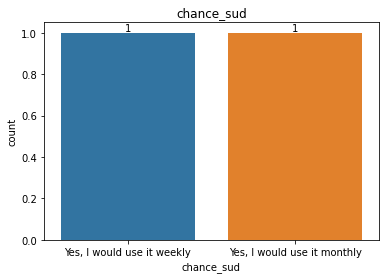

In [102]:
ax = sns.countplot('chance_sud', data =df)
ax.bar_label(ax.containers[0])
plt.title(df.columns[column_names.index('chance_sud')])
plt.show()

If the patients are given change to use self-guided real-life scenario to overcome their substance abuse 50 % of them will be using it weekly while 50 % of them will be using it monthly

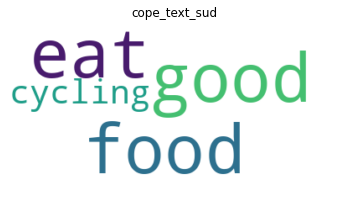

In [103]:
# word cloud
text = " ".join(text for text in df['cope_text_sud'].dropna())
wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(df.columns[column_names.index('cope_text_sud')])
plt.axis("off")
plt.show()

Most of the people are seen to have used food as their coping method. They are either going for good food consumption or cycling as a way to distract their mind from substance intake and recover from the urge

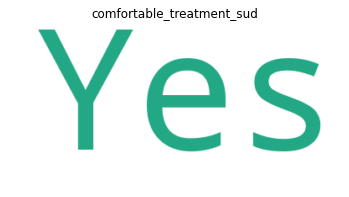

In [104]:
#comfortable_treatment_sud
# word cloud
text = " ".join(text for text in df['comfortable_treatment_sud'].dropna())
wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(df.columns[column_names.index('comfortable_treatment_sud')])
plt.axis("off")
plt.show()



  All of the people who are suffereing from Substance abuse are comfortable with recieving treatment help.

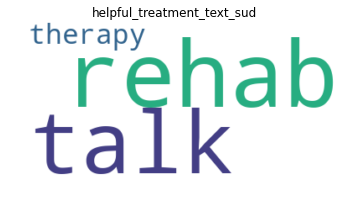

In [105]:
#helpful_treatment_text_sud
# word cloud
text = " ".join(text for text in df['helpful_treatment_text_sud'].dropna())
wordcloud = WordCloud(background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(df.columns[column_names.index('helpful_treatment_text_sud')])
plt.axis("off")
plt.show()


 According to the Many people are open to the therapy as the question we asked was how they really felt that would help the therapist to deal with the patient. They were more open to talking and rehab.